# Quickstart

This quickstart tutorial takes you through the main steps for generating synthetic data from multivatiate correlated profiles or temeprature using copula and fPCA models

## Load required modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import synthia as syn

## Define plotting function

In [2]:
def plot_profiles(ds, var_name, n_profiles=100):
    _, ax = plt.subplots(figsize=(6, 4))
    for column in np.random.choice(ds.column, n_profiles):
        ds[var_name].sel(column=column).plot(ax=ax, c='#332288', alpha=0.15)
    ax.set_ylabel('Air temperature in K')
    ax.set_xlabel('Atmospheric level')

## Load and plot sample data

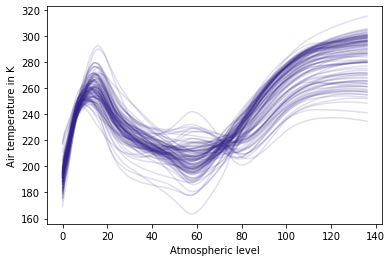

In [3]:
ds_true = syn.util.load_dataset(name='SAF-Synthetic')
plot_profiles(ds_true, 'temperature_fl')

## Fit and generate 1000 random samples using Gaussian copula

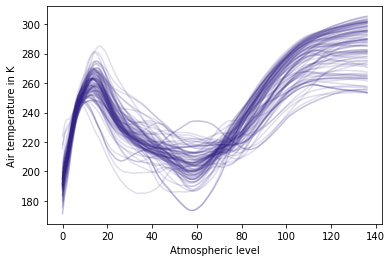

In [4]:
generator = syn.CopulaDataGenerator()
generator.fit(ds_true, copula=syn.GaussianCopula(), parameterize_by=None)

N_SAMPLES = 1000
ds_synth_copula = generator.generate(N_SAMPLES)

plot_profiles(ds_synth_copula, 'temperature_fl')

## Fit and generate 1000 random samples using fPCA

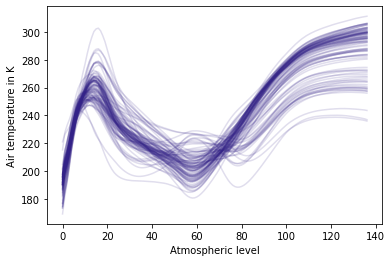

In [5]:
generator = syn.FPCADataGenerator()
generator.fit(ds_true, n_fpca_components=5)

N_SAMPLES = 1000
ds_synth_fpca = generator.generate(N_SAMPLES)

plot_profiles(ds_synth_fpca, 'temperature_fl')